In [1]:
from importlib.resources import files
from Consensus import *

In [2]:
EXAMPLE_TREES_PATH = files("Consensus.example_data").joinpath("GTRgamma_edit.nex")
EXAMPLE_ASTRAL_TREE_PATH = files("Consensus.example_data").joinpath("astral_GTRgamma.tre")

# Load Data

In [3]:
from Consensus import *
import ete3

In [4]:
input_trees = TreeList_with_support.get(path = EXAMPLE_TREES_PATH, schema = "nexus") # for files containing multiple trees

# please specify the same 'taxon_namespace' object when reading the data


In [5]:
# majority rule consensus
majority = input_trees.majority_rule_consensus()

In [6]:
majority.compute_branch_support(treelist=input_trees)
majority.compute_transfer_support(treelist=input_trees)

In [7]:
t,ts = plot_example_func(majority)

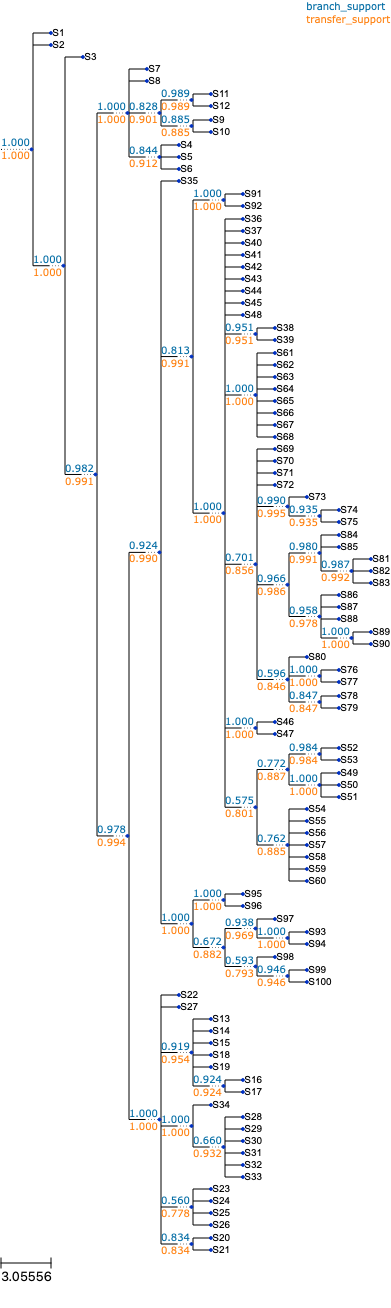

In [8]:
t.render(file_name="%%inline",tree_style=ts)

In [9]:
t.render(file_name="test_majority.png",tree_style=ts)

{'nodes': [[29.5, 121.3671875, 33.5, 125.3671875, 0, None],
  [48.86363636363636, 5.0, 52.86363636363636, 9.0, 1, None],
  [48.86363636363636, 17.0, 52.86363636363636, 21.0, 2, None],
  [61.5, 237.734375, 65.5, 241.734375, 3, None],
  [80.86363636363636, 29.0, 84.86363636363636, 33.0, 4, None],
  [93.5, 446.46875, 97.5, 450.46875, 5, None],
  [125.5, 85.0, 129.5, 89.0, 6, None],
  [144.86363636363637, 41.0, 148.86363636363637, 45.0, 7, None],
  [144.86363636363637, 53.0, 148.86363636363637, 57.0, 8, None],
  [157.5, 85.0, 161.5, 89.0, 9, None],
  [189.5, 72.0, 193.5, 76.0, 10, None],
  [208.86363636363637, 66.0, 212.86363636363637, 70.0, 11, None],
  [208.86363636363637, 78.0, 212.86363636363637, 82.0, 12, None],
  [189.5, 98.0, 193.5, 102.0, 13, None],
  [208.86363636363637, 92.0, 212.86363636363637, 96.0, 14, None],
  [208.86363636363637, 104.0, 212.86363636363637, 108.0, 15, None],
  [157.5, 129.0, 161.5, 133.0, 16, None],
  [176.86363636363637, 117.0, 180.86363636363637, 121.0, 17,

In [10]:
ts.rotation = 90
t.render(file_name="test_majority_rotate.png",tree_style=ts)

{'nodes': [[1106.6328125,
   448.8181818181818,
   1110.6328125,
   452.8181818181818,
   0,
   None],
  [1223.0, 468.1818181818182, 1227.0, 472.1818181818182, 1, None],
  [1211.0, 468.1818181818182, 1215.0, 472.1818181818182, 2, None],
  [990.265625, 480.8181818181818, 994.265625, 484.8181818181818, 3, None],
  [1199.0, 500.1818181818182, 1203.0, 504.1818181818182, 4, None],
  [781.53125, 512.8181818181818, 785.53125, 516.8181818181818, 5, None],
  [1143.0, 544.8181818181818, 1147.0, 548.8181818181818, 6, None],
  [1187.0, 564.1818181818181, 1191.0, 568.1818181818181, 7, None],
  [1175.0, 564.1818181818181, 1179.0, 568.1818181818181, 8, None],
  [1143.0, 576.8181818181818, 1147.0, 580.8181818181818, 9, None],
  [1156.0, 608.8181818181818, 1160.0, 612.8181818181818, 10, None],
  [1162.0, 628.1818181818181, 1166.0, 632.1818181818181, 11, None],
  [1150.0, 628.1818181818181, 1154.0, 632.1818181818181, 12, None],
  [1130.0, 608.8181818181818, 1134.0, 612.8181818181818, 13, None],
  [1136.

In [ ]:
## length as support 
for edge in majority.postorder_edge_iter():
    edge.length = majority.branch_support[int(edge.bipartition)]

In [ ]:
string=majority.as_string(schema='newick',suppress_rooting=True)

In [ ]:
print(string)

In [11]:
type(majority.taxon_namespace)

dendropy.datamodel.taxonmodel.TaxonNamespace

In [ ]:
t = ete3.Tree(string)
ts=ete3.TreeStyle()
ts.mode = "c"
ts.arc_start = -180 # 0 degrees = 3 o'clock
ts.arc_span = 180
t.render(file_name="%%inline",tree_style=ts)

In [ ]:

ts=ete3.TreeStyle()

In [ ]:
color = ["#006BA4", "#FF800E", "#ABABAB", "#595959",
                 "#5F9ED1", "#C85200", "#898989", "#A2C8EC", "#FFBC79", "#CFCFCF"]
_ = get_support(t,majority.taxon_namespace,majority.branch_support,pos = 0,leaf_support = False)
# legendの追加, color配列用意しなきゃいけなくなったのすごい悲しい
ts.legend.add_face(ete3.TextFace("branch_support",fgcolor=color[0]), column=0)
_ = get_support(t,majority.taxon_namespace,majority.transfer_support,pos = 1,leaf_support = False)
ts.legend.add_face(ete3.TextFace("transfer_support",fgcolor=color[1]), column=0)

In [ ]:
t.render(file_name="")

In [ ]:
ts.rotation = 0
ts.mode='c'
t.render(file_name="%%inline",tree_style=ts)

In [ ]:
ts.mode = "c"
ts.arc_start = -180 # 0 degrees = 3 o'clock
ts.arc_span = 180
t.render(file_name="%%inline",tree_style=ts)